In [1]:
library(dplyr)
library(Seurat)
library(patchwork)
beta <- readRDS("/gpfs/commons/groups/zhu_lab/nattada/data/BetaCellDifferentiationProject/Deep/newpipeline/5.merged/SeuratSubsetBeta.rds")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



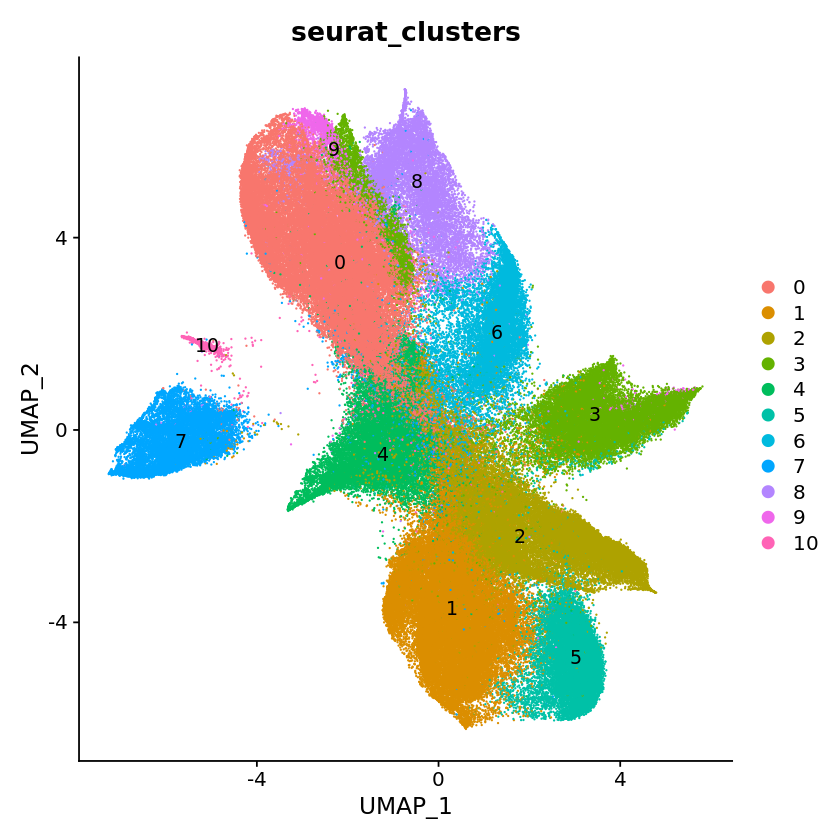

In [2]:
DimPlot(beta, raster=FALSE, label=T, group.by="seurat_clusters")

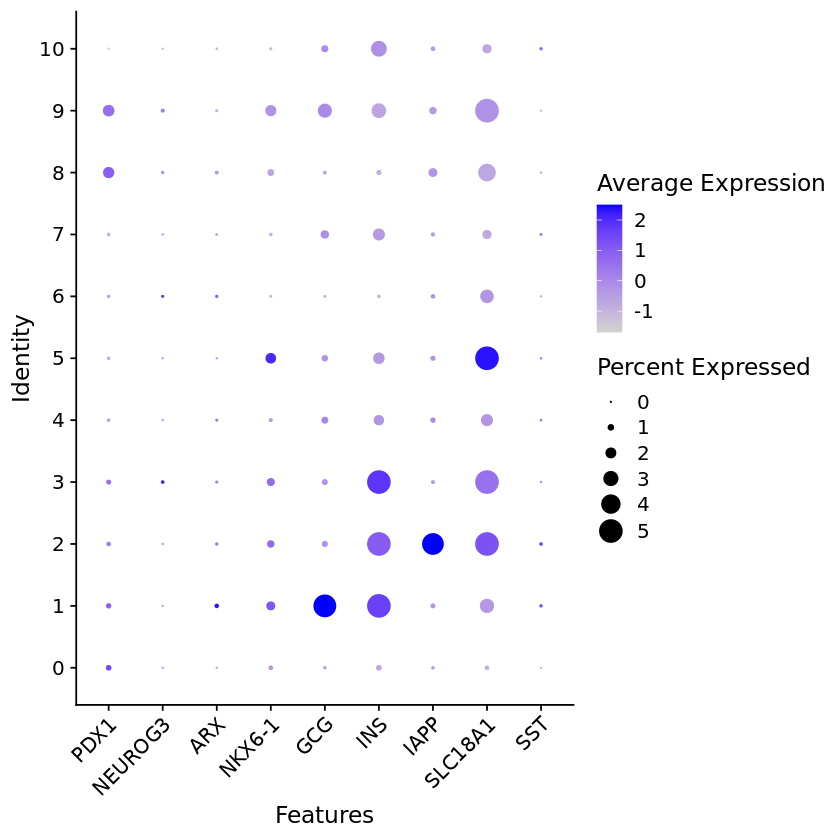

In [3]:
genes<-c("PDX1","NEUROG3","ARX","NKX6-1","GCG","INS","IAPP","SLC18A1","SST")
DotPlot(beta, features= genes, scale.max = 5) + RotatedAxis()

In [4]:
sc<-beta$seurat_clusters
Annotation<-rep("Unknow", dim(beta@meta.data)[1])
Annotation[sc==0]<-"PP1_2" # cluster0, PDX1
Annotation[sc==1]<-"SC-alpha_D22" # cluster1, GCG, INS, SST
Annotation[sc==2]<-"SC-beta" # cluster2, INS, IAPP, SLC18A1
Annotation[sc==3]<-"ENP2" # cluster3, NEUROG3, INS, SLC18A1
Annotation[sc==4]<-"ENP-alpha" # cluster4, ARX?
Annotation[sc==5]<-"SC-EC" # cluster5, NKX6-1, SLC18A1
Annotation[sc==6]<-"ENP1" # cluster6, NEUROG3
Annotation[sc==7]<-"SC-alpha" # cluster7, GCG, INS
Annotation[sc==8]<-"ENP3" # cluster8, PDX1, SLC18A1
Annotation[sc==9]<-"ENP3" # cluster9, PDX1, SLC18A1
Annotation[sc==10]<-"SC-delta" # cluster10, INS, SST


## PP1_2 c0 # PDX1
## ENP1 c6  # NEUROG3
## ENP2 c3  # INS
## ENP3 c8, c9 # SLC18A1
## ENP-alpha c4 # ARX
## SC-alpha_D22 c1 # GCG
## SC-alpha c7 # GCG
## SC-beta c2 # IAPP
## SC-delta c10 # SST
## SC-EC c5 # NKX6-1

beta$Annotation<-factor(Annotation, levels=c("PP1_2","ENP1","ENP2","ENP3","ENP-alpha","SC-alpha_D22","SC-alpha","SC-beta","SC-delta","SC-EC"))


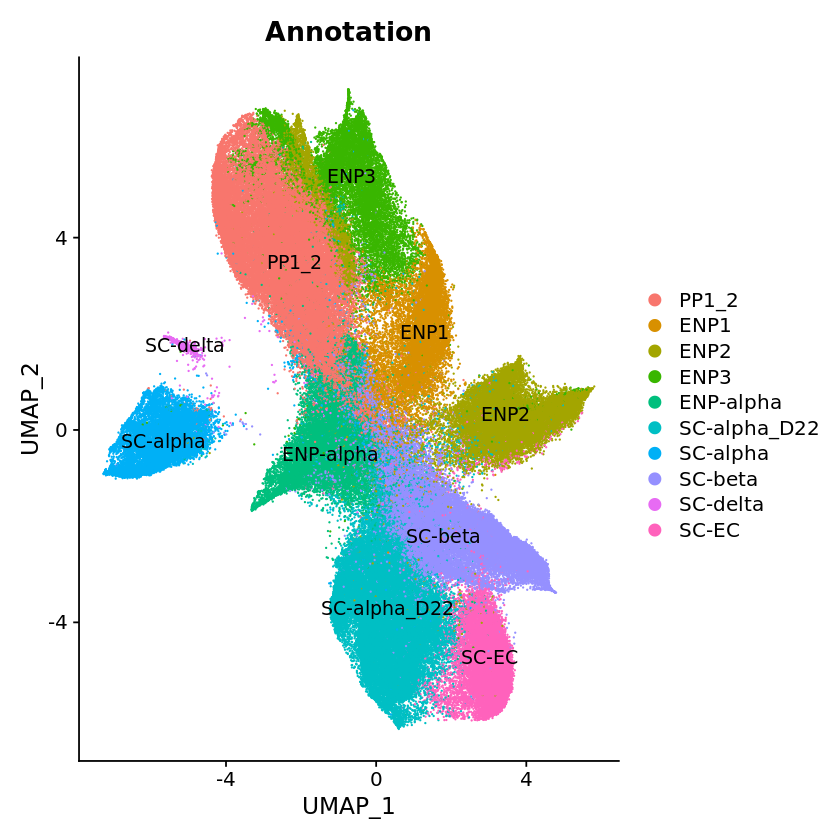

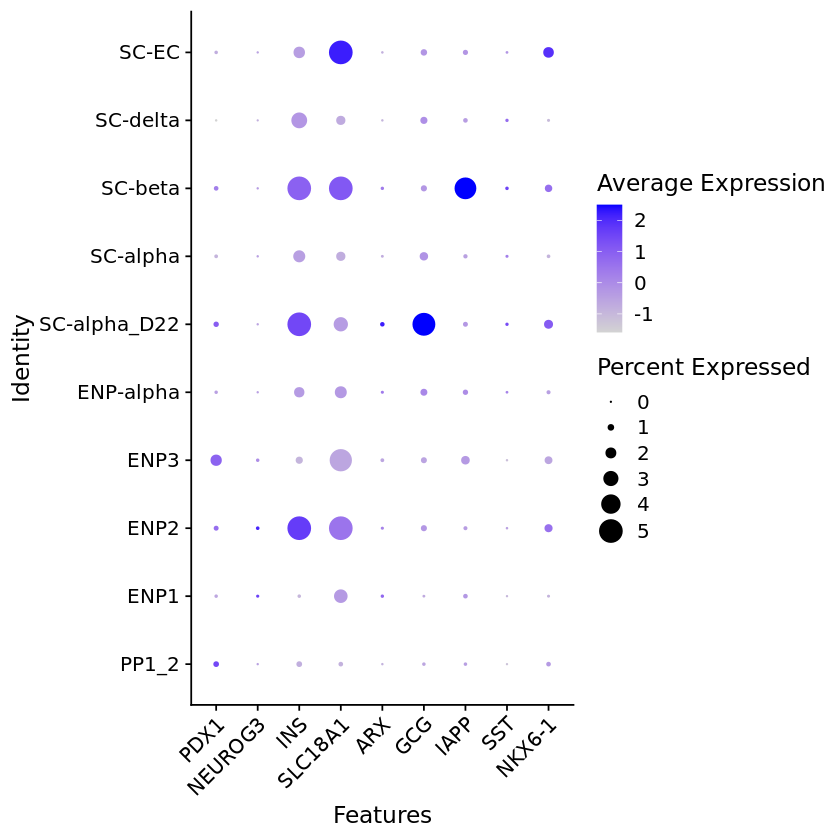

In [5]:
DimPlot(beta, raster=FALSE, label=T, group.by="Annotation")
genes<-c("PDX1","NEUROG3","INS","SLC18A1","ARX","GCG","IAPP","SST","NKX6-1")
Idents(beta)<-beta$Annotation
DotPlot(beta, features= genes, scale.max = 5) + RotatedAxis()

In [7]:
head(beta@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.1,seurat_clusters,target,stage,stage1,RNA_snn_res.0.3,Annotation
,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>,<fct>,<fct>
01:A1:B5:12,beta,290,268,0.6896552,3,2,H3K27ac,D41,D41,2,SC-beta
01:A1:BF:08,beta,248,235,0.4032258,0,0,H3K27ac,D15,D15,0,PP1_2
01:A1:BI:08,beta,404,353,0.0000000,6,3,H3K27ac,D15,D15,3,ENP2
01:A1:BI:09,beta,236,217,0.0000000,2,5,H3K27ac,D22,D22,5,SC-EC
01:A1:BQ:09,beta,512,443,0.7812500,2,5,H3K27ac,D22,D22,5,SC-EC
01:A1:BQ:11,beta,232,221,0.4310345,1,4,H3K27ac,D41,D41,4,ENP-alpha


In [8]:
saveRDS(beta, file = "SeuratSubsetBeta.rds")